# Explorative Data Analysis


## Meta Information
- Structured data - computer resources 
Similiar to docker stats command: https://docker-py.readthedocs.io/en/stable/containers.html#docker.models.containers.Container.stats, https://docs.docker.com/config/containers/runmetrics/
    time series: datetime format 
    cpu usage:
    memory usage: 
    network received: rx (Received) bytes 
    network send: tx (Transmit) bytes 
    storage read:
    storage written:
- Unsupervised Problem - Unsupervised means no labels and a model is trained on the complete data and assumes that the majority of the instances are normal.
- was sind das für Größen, Skalierbarkeit ? verschieddene größen 
- fruterh ideas : time series data lags, autocorrelation 

 eth0 - Network Interface Linux

In [1]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.dates

In [2]:
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/train.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/test.pkl")
#len(test.timestamp.unique()) # all unique so we can use it as index 
train = train.set_index('timestamp')
test = test.set_index('timestamp')

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9564 entries, 2021-09-09 23:21:47.309000 to 2021-09-15 12:32:22.769000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpu_usage         9564 non-null   float64
 1   memory_usage      9564 non-null   int64  
 2   network_received  9564 non-null   int64  
 3   network_send      9564 non-null   int64  
 4   storage_read      9564 non-null   int64  
 5   storage_written   9564 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 523.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39927 entries, 2021-12-21 16:29:19.790000 to 2021-09-09 18:17:44.974000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpu_usage         39927 non-null  float64
 1   memory_usage      39927 non-null  int64  
 2   network_received  39927 non-null  int64  
 3   network_send      3

In [5]:
train.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
timestamp,,,,,,
2021-09-09 23:21:47.309,0.111557,17649664,7532,18490,0,0
2021-09-09 23:21:48.319,0.123430,19746816,5158,11520,0,0
2021-09-09 23:21:49.336,0.121031,21782528,2818,11246,0,0
2021-09-09 23:21:50.345,0.145855,25518080,4402,13775,0,0
2021-09-09 23:21:51.364,0.343448,32534528,9146,36294,0,0


In [4]:
test.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
timestamp,,,,,,
2021-12-21 16:29:19.790,0.000556,13762560,872,0,0,0
2021-12-21 16:29:20.795,0.000329,13762560,422,0,0,0
2021-12-21 16:29:21.802,0.121941,16089088,4671,13851,0,0
2021-12-21 16:29:22.808,0.021975,17104896,221,0,0,0
2021-12-21 16:29:23.815,0.059089,19099648,0,0,0,0


In [9]:
# Check for missing values
print("#######################")
print("Train Data:")
print("#######################")
print(train.isnull().sum())
print("#######################")
print("Test Data")
print("#######################")
print(test.isnull().sum())

#######################
Train Data:
#######################
cpu_usage           0
memory_usage        0
network_received    0
network_send        0
storage_read        0
storage_written     0
dtype: int64
#######################
Test Data
#######################
cpu_usage           0
memory_usage        0
network_received    0
network_send        0
storage_read        0
storage_written     0
dtype: int64


In [10]:
print("#######################")
print("Train Data:")
print("#######################")
print(train.shape)
print("#######################")
print("Test Data")
print("#######################")
print(test.shape)

#######################
Train Data:
#######################
(9564, 6)
#######################
Test Data
#######################
(39927, 6)


In [14]:
train.describe() # Only positive values

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000
mean,0.141092,3.586510e+07,4084.739753,16489.362087,67.238812,154.606441
std,0.107538,8.686077e+06,3197.226831,29075.417379,4265.001791,1107.688249
min,0.000277,1.531904e+07,0.000000,0.000000,0.000000,0.000000
25%,0.076871,3.189555e+07,2091.000000,6932.000000,0.000000,0.000000
50%,0.123746,3.720806e+07,3485.000000,11631.000000,0.000000,0.000000
75%,0.181755,4.089446e+07,5227.000000,18469.000000,0.000000,0.000000
max,1.146535,6.668288e+07,28425.000000,354543.000000,356352.000000,20480.000000


In [11]:
test.describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,39927.000000,3.992700e+04,39927.000000,39927.000000,3.992700e+04,3.992700e+04
mean,0.141173,3.568852e+07,4121.127733,16244.512260,3.506431e+02,2.255893e+02
std,0.111868,8.876811e+06,3479.540021,29279.070981,1.623316e+04,1.177772e+04
min,0.000129,1.361920e+07,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.071625,3.198566e+07,2090.000000,5374.500000,0.000000e+00,0.000000e+00
50%,0.125114,3.719578e+07,3485.000000,11593.000000,0.000000e+00,0.000000e+00
75%,0.184521,4.099277e+07,5395.000000,18557.500000,0.000000e+00,0.000000e+00
max,2.314982,7.683277e+07,35819.000000,614079.000000,1.503232e+06,2.342912e+06


In [8]:
# check variances 
train.var()

cpu_usage           1.156453e-02
memory_usage        7.544793e+13
network_received    1.022226e+07
network_send        8.453799e+08
storage_read        1.819024e+07
storage_written     1.226973e+06
dtype: float64

## Distribution for each Feature

### CPU-Usage

CPU-Usage and Memory Consumption are propably the best indicators

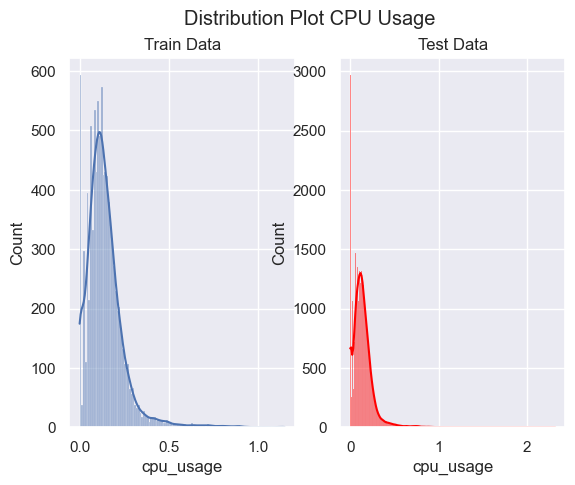

In [30]:
fig, axes = plt.subplots(1,2)
sns.set()
fig.suptitle('Distribution Plot CPU Usage')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
sns.histplot(train.cpu_usage, kde=True, ax=axes[0])# left skewed
sns.histplot(test.cpu_usage, kde=True, ax=axes[1], color='red') # left skewed
plt.show()

In [31]:
print("#############################")
print("Train Data:")
print("#############################")
print("Skewness: %f" % train['cpu_usage'].skew())
print("Kurtosis: %f" % train['cpu_usage'].kurt())
print("#############################")
print("Test Data:")
print("#############################")
print("Skewness: %f" % test['cpu_usage'].skew())
print("Kurtosis: %f" % test['cpu_usage'].kurt())

#############################
Train Data:
#############################
Skewness: 2.476019
Kurtosis: 11.709240
#############################
Test Data:
#############################
Skewness: 2.678905
Kurtosis: 16.378067


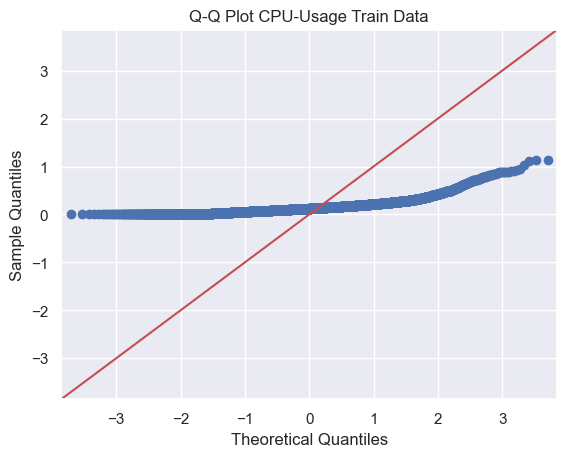

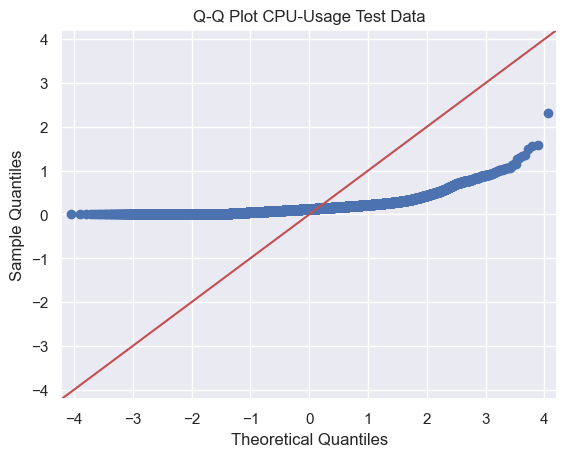

In [32]:
# Q-Q Plot 
fig = sm.qqplot(train.cpu_usage, line='45') # cpu usage does not follow normal behaviour
plt.title("Q-Q Plot CPU-Usage Train Data")
plt.show()
# Q-Q Plot 
fig = sm.qqplot(test.cpu_usage, line='45') # cpu usage does follow normal behaviour
plt.title("Q-Q Plot CPU-Usage Test Data")
plt.show()

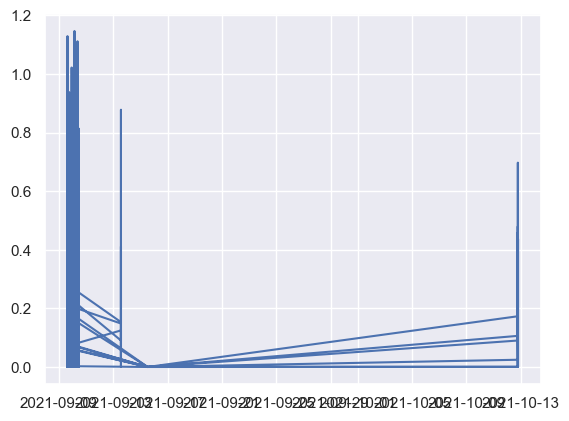

In [157]:
plt.plot(train.index, train.cpu_usage)

### Memory Consumption

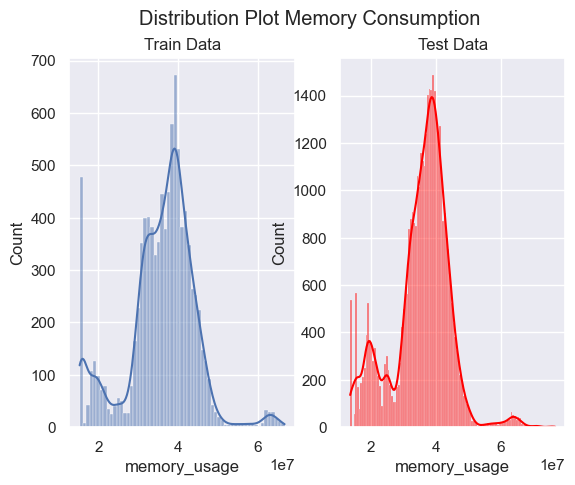

In [34]:
fig, axes = plt.subplots(1,2)
sns.set()
fig.suptitle('Distribution Plot Memory Consumption')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
sns.histplot(train['memory_usage'], kde=True, ax=axes[0])# left skewed
sns.histplot(test['memory_usage'], kde=True, ax=axes[1], color='red') # left skewed
plt.show()

<AxesSubplot:>

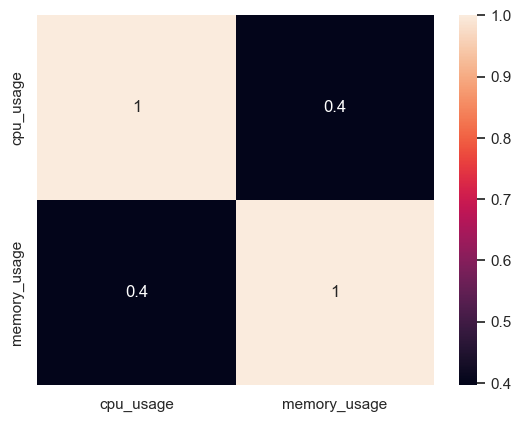

In [160]:
# check correlation between cpu and memory usage
corr = train[['cpu_usage','memory_usage']].corr()
sns.heatmap(corr, annot=True)

## Network send and Network received

center close to/ around zero with huge outliers --> How to handle? Try different Transformations

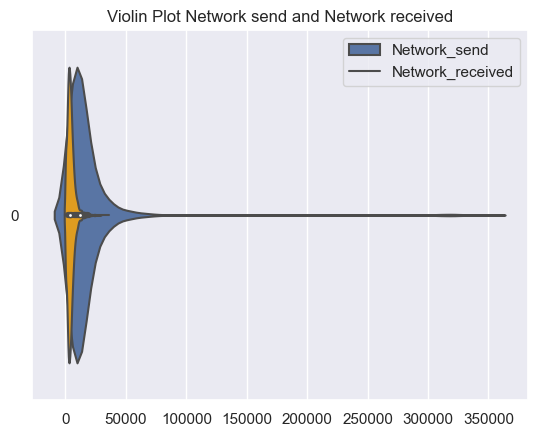

In [135]:
f, ax = plt.subplots(1,1)
plt.title("Violin Plot Network send and Network received")
sns.violinplot(train.network_send, orient='h', ax=ax)
sns.violinplot(train.network_received, orient='h', color="orange", ax=ax)
plt.legend(labels=["Network_send", "Network_received"])
plt.show()

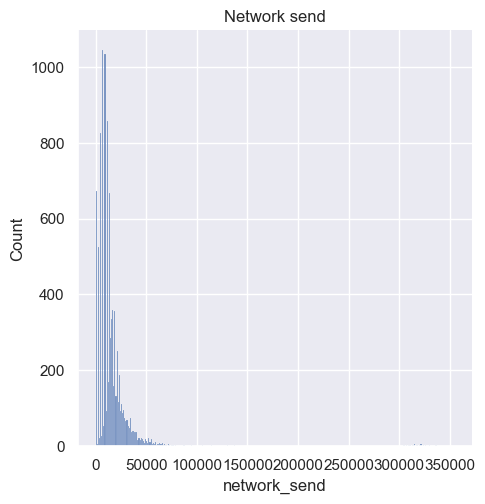

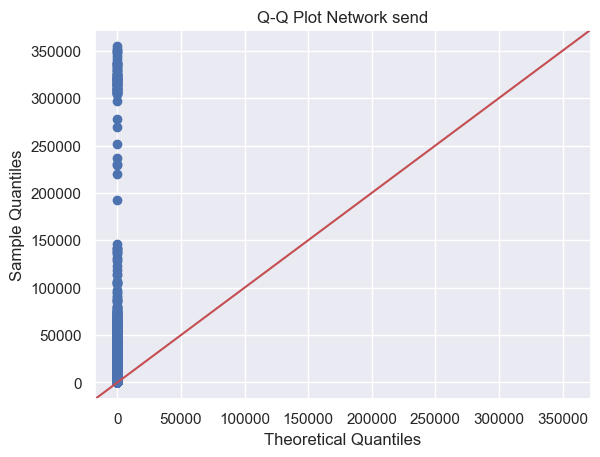

In [148]:
# Displot
sns.displot(train.network_send).set(title="Network send")
# Q-Q Plot 
fig = sm.qqplot(train.network_send, line='45') # Cpu_Usage follows normal behaviour
plt.title("Q-Q Plot Network send")
plt.show()

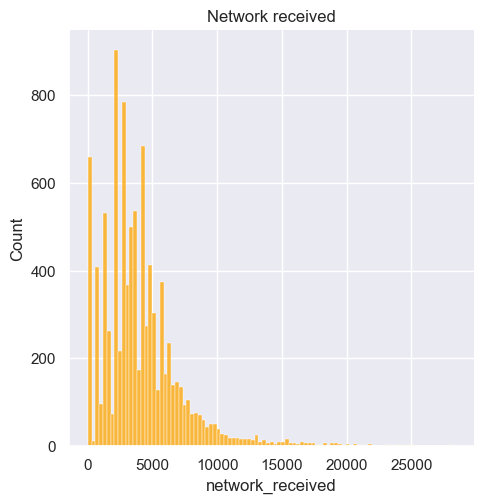

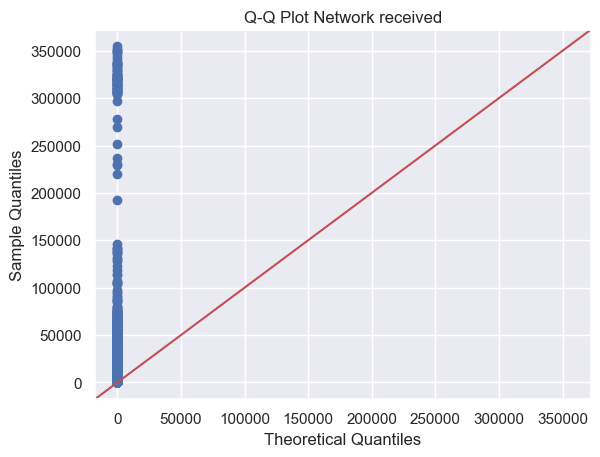

In [149]:
# Distplot
sns.displot(train.network_received, color="orange").set(title="Network received")
# Q-Q Plot 
fig = sm.qqplot(train.network_send, line='45') # Cpu_Usage follows normal behaviour
plt.title("Q-Q Plot Network received")
plt.show()

<AxesSubplot:>

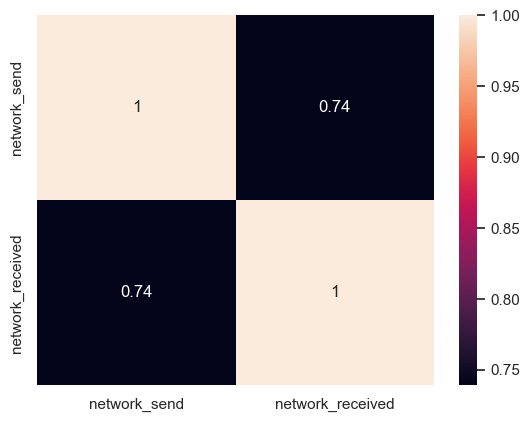

In [162]:
# check correlation between both
corr = train[['network_send','network_received']].corr()
sns.heatmap(corr, annot=True)

## Storage read and Storage written

Same behaviour as Network send and Network received, center around zero but huge outliers


<AxesSubplot:title={'center':'Scatterplot Storage read and Storage written'}, xlabel='timestamp', ylabel='storage_read'>

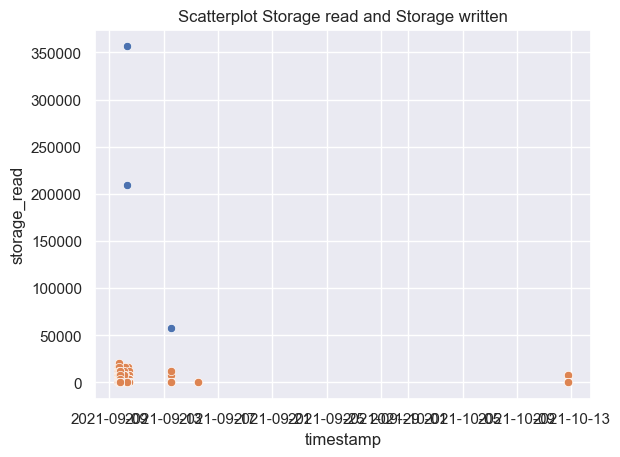

In [137]:
plt.title("Scatterplot Storage read and Storage written")
sns.scatterplot(train.storage_read)
sns.scatterplot(train.storage_written)

<AxesSubplot:>

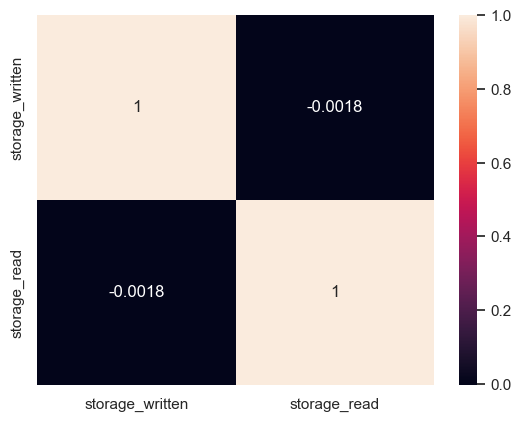

In [163]:
corr = train[['storage_written','storage_read']].corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

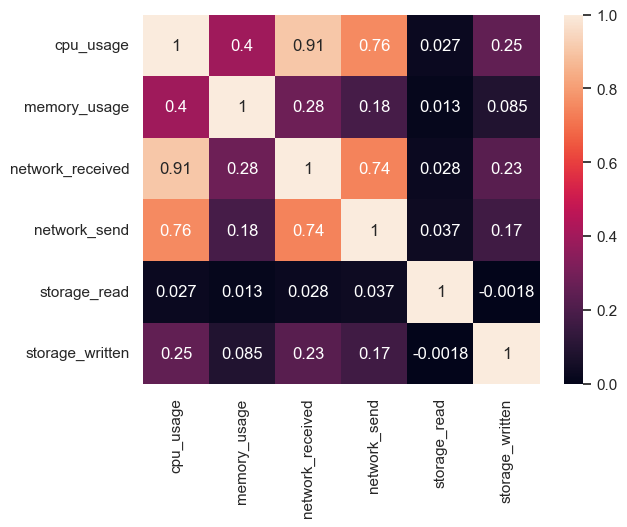

In [165]:
# Correlation of all features -> remember different Scales!
sns.heatmap(train.corr(), annot=True)

## Normalization Methods 

- Calculate IQR(?)
- Search for different transformation models, Arima, time series data 


In [ ]:
train.str